# Let's load the data!

I am using COE pricing data from https://coe.sgcharts.com/, the owner of the website is maintaining the dataset on https://docs.google.com/spreadsheet/ccc?key=0ArgBv2Jut0VxdEdZQkFWelRiSTQ5MUdzSXdnVHkzRUE&usp=sharing

In [1]:
import pandas as pd

df = pd.read_csv('../data/coe_prices.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Bidding Exercise           2325 non-null   object
 1   Announcement Date          2325 non-null   object
 2   Year                       2325 non-null   int64 
 3   Category                   2325 non-null   object
 4   Quota                      2325 non-null   object
 5   Quota Premium              2325 non-null   object
 6   Total Bids Received        2325 non-null   object
 7   Number of Successful Bids  2325 non-null   object
dtypes: int64(1), object(7)
memory usage: 145.4+ KB


In [2]:
df.head()

,Bidding Exercise,Announcement Date,Year,Category,Quota,Quota Premium,Total Bids Received,Number of Successful Bids
0,November 2021 First Open Bidding Exercise,03/11/2021,2021,Cat A (Cars up to 1600cc and 97kW),536,"$53,709",834,531
1,November 2021 First Open Bidding Exercise,03/11/2021,2021,Cat B (Cars above 1600cc or 97kW),587,"$82,801",839,581
2,November 2021 First Open Bidding Exercise,03/11/2021,2021,Cat C (Goods vehicles and buses),92,"$42,001",173,89
3,November 2021 First Open Bidding Exercise,03/11/2021,2021,Cat D (Motorcycles),417,"$9,381",543,409
4,November 2021 First Open Bidding Exercise,03/11/2021,2021,Cat E (Open),159,"$88,000",257,155


In [3]:
col_names = ['bidding_exercise', 'date', 'year', 'category', 'quota', 'price', 'total_bids', 'success_bids']
df.set_axis(col_names, axis=1, inplace=True)

df.head()

,bidding_exercise,date,year,category,quota,price,total_bids,success_bids
0,November 2021 First Open Bidding Exercise,03/11/2021,2021,Cat A (Cars up to 1600cc and 97kW),536,"$53,709",834,531
1,November 2021 First Open Bidding Exercise,03/11/2021,2021,Cat B (Cars above 1600cc or 97kW),587,"$82,801",839,581
2,November 2021 First Open Bidding Exercise,03/11/2021,2021,Cat C (Goods vehicles and buses),92,"$42,001",173,89
3,November 2021 First Open Bidding Exercise,03/11/2021,2021,Cat D (Motorcycles),417,"$9,381",543,409
4,November 2021 First Open Bidding Exercise,03/11/2021,2021,Cat E (Open),159,"$88,000",257,155


# Converting columns data types!

The data types in all columns are type String, which can be difficult to manipulate later on, let's clean the data and convert them to useful/representative data types!

In [4]:
#Convert date field from string to a datetime datatype
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

#Strip dollar signs and commas, convert numerical fields from string to int data types
df['quota'] = df['quota'].str.replace(',', '')
df['quota'] = pd.to_numeric(df['quota'])

df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].str.replace('$', '')
df['price'] = pd.to_numeric(df['price'])

df['total_bids'] = df['total_bids'].str.replace(',', '')
df['total_bids'] = df['total_bids'].astype(int)

df['success_bids'] = df['success_bids'].str.replace(',', '')
df['success_bids'] = df['success_bids'].astype(int)

df.head()

/Users/tohyuheng/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  if __name__ == '__main__':


,bidding_exercise,date,year,category,quota,price,total_bids,success_bids
0,November 2021 First Open Bidding Exercise,2021-11-03,2021,Cat A (Cars up to 1600cc and 97kW),536,53709,834,531
1,November 2021 First Open Bidding Exercise,2021-11-03,2021,Cat B (Cars above 1600cc or 97kW),587,82801,839,581
2,November 2021 First Open Bidding Exercise,2021-11-03,2021,Cat C (Goods vehicles and buses),92,42001,173,89
3,November 2021 First Open Bidding Exercise,2021-11-03,2021,Cat D (Motorcycles),417,9381,543,409
4,November 2021 First Open Bidding Exercise,2021-11-03,2021,Cat E (Open),159,88000,257,155


In [5]:
df['date'].min()

Timestamp('2002-04-01 00:00:00')

In [6]:
df['date'].max()

Timestamp('2021-11-03 00:00:00')

In [7]:
df.dtypes

bidding_exercise            object
date                datetime64[ns]
year                         int64
category                    object
quota                        int64
price                        int64
total_bids                   int64
success_bids                 int64
dtype: object

In [8]:
#Get data from Category A and Category B respectively
cat_a = df.loc[df['category'] == 'Cat A (Cars up to 1600cc and 97kW)']
cat_b = df.loc[df['category'] == 'Cat B (Cars above 1600cc or 97kW)']

cat_a.reset_index(drop=True, inplace=True)
cat_b.reset_index(drop=True, inplace=True)

cat_a.head()

,bidding_exercise,date,year,category,quota,price,total_bids,success_bids
0,November 2021 First Open Bidding Exercise,2021-11-03,2021,Cat A (Cars up to 1600cc and 97kW),536,53709,834,531
1,October 2021 Second Open Bidding Exercise,2021-10-20,2021,Cat A (Cars up to 1600cc and 97kW),811,52709,1304,806
2,October 2021 First Open Bidding Exercise,2021-10-06,2021,Cat A (Cars up to 1600cc and 97kW),816,47001,1077,812
3,September 2021 Second Open Bidding Exercise,2021-09-22,2021,Cat A (Cars up to 1600cc and 97kW),803,48000,1040,795
4,September 2021 First Open Bidding Exercise,2021-09-08,2021,Cat A (Cars up to 1600cc and 97kW),804,47000,1124,790


In [9]:
cat_a.corr().style.background_gradient(cmap='coolwarm')

,year,quota,price,total_bids,success_bids
year,1.000000,-0.354476,0.482851,-0.287532,-0.356616
quota,-0.354476,1.000000,-0.700298,0.909257,0.999591
price,0.482851,-0.700298,1.000000,-0.580676,-0.700750
total_bids,-0.287532,0.909257,-0.580676,1.000000,0.908510
success_bids,-0.356616,0.999591,-0.700750,0.908510,1.000000


In [10]:
cat_b.corr().style.background_gradient(cmap='coolwarm')

,year,quota,price,total_bids,success_bids
year,1.000000,0.088226,0.505790,0.207176,0.088165
quota,0.088226,1.000000,-0.599133,0.888148,0.999507
price,0.505790,-0.599133,1.000000,-0.403314,-0.597257
total_bids,0.207176,0.888148,-0.403314,1.000000,0.886489
success_bids,0.088165,0.999507,-0.597257,0.886489,1.000000


# Data Visualisation

array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='quota', ylabel='year'>,
        <AxesSubplot:xlabel='price', ylabel='year'>,
        <AxesSubplot:xlabel='total_bids', ylabel='year'>,
        <AxesSubplot:xlabel='success_bids', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='quota'>,
        <AxesSubplot:xlabel='quota', ylabel='quota'>,
        <AxesSubplot:xlabel='price', ylabel='quota'>,
        <AxesSubplot:xlabel='total_bids', ylabel='quota'>,
        <AxesSubplot:xlabel='success_bids', ylabel='quota'>],
       [<AxesSubplot:xlabel='year', ylabel='price'>,
        <AxesSubplot:xlabel='quota', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='total_bids', ylabel='price'>,
        <AxesSubplot:xlabel='success_bids', ylabel='price'>],
       [<AxesSubplot:xlabel='year', ylabel='total_bids'>,
        <AxesSubplot:xlabel='quota', ylabel='total_bids'>,
        <AxesSubplot:xlabel='price', ylabe

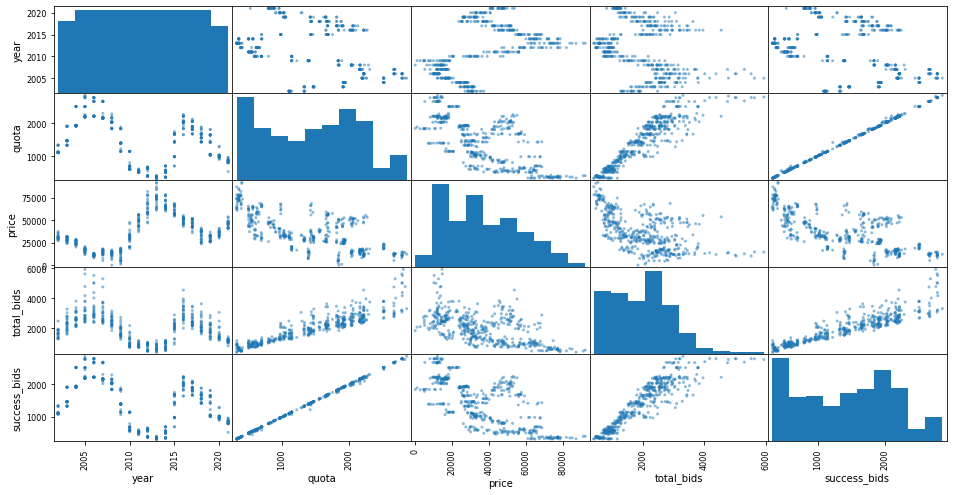

In [11]:
#Scatter plot matrix
pd.plotting.scatter_matrix(cat_a, figsize=(16,8))

# Insights
1. For some variables, the distribution is skewed
2. quota and total_bids shows a strong, direct linear relationship (Pearson correlation value > 0.8)
3. similarly, quota and success_bids are heavily correlated (Pearson correlation value > 0.8)

In [12]:
#Write cleaned data to .csv file
cat_a.to_csv('../data/cat_a.csv', index=False)
cat_b.to_csv('../data/cat_b.csv', index=False)

cat_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465 entries, 0 to 464
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   bidding_exercise  465 non-null    object        
 1   date              465 non-null    datetime64[ns]
 2   year              465 non-null    int64         
 3   category          465 non-null    object        
 4   quota             465 non-null    int64         
 5   price             465 non-null    int64         
 6   total_bids        465 non-null    int64         
 7   success_bids      465 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 29.2+ KB


# Merging vehicle population data

I have also sourced for monthly vehicle population data (i.e. population, registration and de-registration), let's merge them together with COE pricing data

In [13]:
#Read vehicle population data (no. of population, registration, deregistration)
population = pd.read_csv('../data/vehicle_population.csv')

population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date                       377 non-null    object
 1   Category A Population      377 non-null    object
 2   Category B Population      377 non-null    object
 3   Category A Registration    377 non-null    object
 4   Category B Registration    377 non-null    object
 5   Category A Deregistration  377 non-null    object
 6   Category B Deregistration  377 non-null    object
dtypes: object(7)
memory usage: 20.7+ KB


In [14]:
population.head()

,Date,Category A Population,Category B Population,Category A Registration,Category B Registration,Category A Deregistration,Category B Deregistration
0,2021 Sep,"321,025","322,072","1,484","2,403","1,039","1,240"
1,2021 Aug,"320,580","320,909","1,251","2,241","1,256","1,336"
2,2021 Jul,"320,585","320,004","1,598","1,809","1,249","1,332"
3,2021 Jun,"320,236","319,527","1,932","2,484","1,864","1,680"
4,2021 May,"320,168","318,723","1,519","2,240","1,872","1,798"


In [15]:
#Extract date column and drop, to be concatenated after transforming the rest of numerical data
date = population['Date']
population = population.drop(columns = ['Date'])

population.head()

,Category A Population,Category B Population,Category A Registration,Category B Registration,Category A Deregistration,Category B Deregistration
0,"321,025","322,072","1,484","2,403","1,039","1,240"
1,"320,580","320,909","1,251","2,241","1,256","1,336"
2,"320,585","320,004","1,598","1,809","1,249","1,332"
3,"320,236","319,527","1,932","2,484","1,864","1,680"
4,"320,168","318,723","1,519","2,240","1,872","1,798"


In [16]:
#Convert to numerical data types
population = population.replace(',', '', regex=True)
population = population.astype(int)

population.head()

,Category A Population,Category B Population,Category A Registration,Category B Registration,Category A Deregistration,Category B Deregistration
0,321025,322072,1484,2403,1039,1240
1,320580,320909,1251,2241,1256,1336
2,320585,320004,1598,1809,1249,1332
3,320236,319527,1932,2484,1864,1680
4,320168,318723,1519,2240,1872,1798


In [17]:
#Concatenate date field and convert date field from string to a datetime datatype
population = pd.concat([date, population], axis=1)
population['Date'] = pd.to_datetime(population['Date'], format='%Y %b')

population.head()

,Date,Category A Population,Category B Population,Category A Registration,Category B Registration,Category A Deregistration,Category B Deregistration
0,2021-09-01,321025,322072,1484,2403,1039,1240
1,2021-08-01,320580,320909,1251,2241,1256,1336
2,2021-07-01,320585,320004,1598,1809,1249,1332
3,2021-06-01,320236,319527,1932,2484,1864,1680
4,2021-05-01,320168,318723,1519,2240,1872,1798


In [18]:
population['Date'].min()

Timestamp('1990-05-01 00:00:00')

In [19]:
population['Date'].max()

Timestamp('2021-09-01 00:00:00')

In [20]:
#Merge original data (COE prices) with car population data (population, registration and deregistration)
cat_a = pd.merge(
    cat_a.assign(grouper=cat_a['date'].dt.to_period('M')),
    population.assign(grouper=population['Date'].dt.to_period('M')),
    how='left', on='grouper'
)

cat_b = pd.merge(
    cat_b.assign(grouper=cat_b['date'].dt.to_period('M')),
    population.assign(grouper=population['Date'].dt.to_period('M')),
    how='left', on='grouper'
)

cat_a.dropna(inplace=True)
cat_b.dropna(inplace=True)

cat_a.reset_index(inplace=True, drop=True)
cat_b.reset_index(inplace=True, drop=True)

cat_a.head()

,bidding_exercise,date,year,category,quota,price,total_bids,success_bids,grouper,Date,Category A Population,Category B Population,Category A Registration,Category B Registration,Category A Deregistration,Category B Deregistration
0,September 2021 Second Open Bidding Exercise,2021-09-22,2021,Cat A (Cars up to 1600cc and 97kW),803,48000,1040,795,2021-09,2021-09-01,321025.0,322072.0,1484.0,2403.0,1039.0,1240.0
1,September 2021 First Open Bidding Exercise,2021-09-08,2021,Cat A (Cars up to 1600cc and 97kW),804,47000,1124,790,2021-09,2021-09-01,321025.0,322072.0,1484.0,2403.0,1039.0,1240.0
2,August 2021 Second Open Bidding Exercise,2021-08-18,2021,Cat A (Cars up to 1600cc and 97kW),806,46689,1127,806,2021-08,2021-08-01,320580.0,320909.0,1251.0,2241.0,1256.0,1336.0
3,August 2021 First Open Bidding Exercise,2021-08-04,2021,Cat A (Cars up to 1600cc and 97kW),805,45189,1021,804,2021-08,2021-08-01,320580.0,320909.0,1251.0,2241.0,1256.0,1336.0
4,July 2021 Second Open Bidding Exercise,2021-07-22,2021,Cat A (Cars up to 1600cc and 97kW),836,47010,1240,832,2021-07,2021-07-01,320585.0,320004.0,1598.0,1809.0,1249.0,1332.0


In [21]:
cat_b.head()

,bidding_exercise,date,year,category,quota,price,total_bids,success_bids,grouper,Date,Category A Population,Category B Population,Category A Registration,Category B Registration,Category A Deregistration,Category B Deregistration
0,September 2021 Second Open Bidding Exercise,2021-09-22,2021,Cat B (Cars above 1600cc or 97kW),772,68310,1189,768,2021-09,2021-09-01,321025.0,322072.0,1484.0,2403.0,1039.0,1240.0
1,September 2021 First Open Bidding Exercise,2021-09-08,2021,Cat B (Cars above 1600cc or 97kW),791,62600,1080,788,2021-09,2021-09-01,321025.0,322072.0,1484.0,2403.0,1039.0,1240.0
2,August 2021 Second Open Bidding Exercise,2021-08-18,2021,Cat B (Cars above 1600cc or 97kW),794,61001,1065,793,2021-08,2021-08-01,320580.0,320909.0,1251.0,2241.0,1256.0,1336.0
3,August 2021 First Open Bidding Exercise,2021-08-04,2021,Cat B (Cars above 1600cc or 97kW),771,56001,980,751,2021-08,2021-08-01,320580.0,320909.0,1251.0,2241.0,1256.0,1336.0
4,July 2021 Second Open Bidding Exercise,2021-07-22,2021,Cat B (Cars above 1600cc or 97kW),819,59501,1107,796,2021-07,2021-07-01,320585.0,320004.0,1598.0,1809.0,1249.0,1332.0


In [22]:
cat_a_cols = ['grouper', 'Date', 'Category B Population', 'Category B Registration', 'Category B Deregistration']
cat_b_cols = ['grouper', 'Date', 'Category A Population', 'Category A Registration', 'Category A Deregistration']

cat_a = cat_a.drop(cat_a_cols, axis=1)
cat_b = cat_b.drop(cat_b_cols, axis=1)

new_col_names = ['bidding_exercise', 'date', 'year', 'category', 'quota', 'price', 'total_bids', 'success_bids', 
                'population', 'registration', 'deregistration']
cat_a.set_axis(new_col_names, axis=1, inplace=True)
cat_b.set_axis(new_col_names, axis=1, inplace=True)

cat_a.head()

,bidding_exercise,date,year,category,quota,price,total_bids,success_bids,population,registration,deregistration
0,September 2021 Second Open Bidding Exercise,2021-09-22,2021,Cat A (Cars up to 1600cc and 97kW),803,48000,1040,795,321025.0,1484.0,1039.0
1,September 2021 First Open Bidding Exercise,2021-09-08,2021,Cat A (Cars up to 1600cc and 97kW),804,47000,1124,790,321025.0,1484.0,1039.0
2,August 2021 Second Open Bidding Exercise,2021-08-18,2021,Cat A (Cars up to 1600cc and 97kW),806,46689,1127,806,320580.0,1251.0,1256.0
3,August 2021 First Open Bidding Exercise,2021-08-04,2021,Cat A (Cars up to 1600cc and 97kW),805,45189,1021,804,320580.0,1251.0,1256.0
4,July 2021 Second Open Bidding Exercise,2021-07-22,2021,Cat A (Cars up to 1600cc and 97kW),836,47010,1240,832,320585.0,1598.0,1249.0


In [23]:
cat_b.head()

,bidding_exercise,date,year,category,quota,price,total_bids,success_bids,population,registration,deregistration
0,September 2021 Second Open Bidding Exercise,2021-09-22,2021,Cat B (Cars above 1600cc or 97kW),772,68310,1189,768,322072.0,2403.0,1240.0
1,September 2021 First Open Bidding Exercise,2021-09-08,2021,Cat B (Cars above 1600cc or 97kW),791,62600,1080,788,322072.0,2403.0,1240.0
2,August 2021 Second Open Bidding Exercise,2021-08-18,2021,Cat B (Cars above 1600cc or 97kW),794,61001,1065,793,320909.0,2241.0,1336.0
3,August 2021 First Open Bidding Exercise,2021-08-04,2021,Cat B (Cars above 1600cc or 97kW),771,56001,980,751,320909.0,2241.0,1336.0
4,July 2021 Second Open Bidding Exercise,2021-07-22,2021,Cat B (Cars above 1600cc or 97kW),819,59501,1107,796,320004.0,1809.0,1332.0


In [24]:
cat_a.corr().style.background_gradient(cmap='coolwarm')

,year,quota,price,total_bids,success_bids,population,registration,deregistration
year,1.000000,-0.347764,0.480307,-0.280570,-0.349994,0.680427,-0.440220,-0.383948
quota,-0.347764,1.000000,-0.699102,0.908710,0.999588,-0.683203,0.937013,0.828931
price,0.480307,-0.699102,1.000000,-0.579009,-0.699555,0.598201,-0.705983,-0.483087
total_bids,-0.280570,0.908710,-0.579009,1.000000,0.907960,-0.618771,0.836297,0.793687
success_bids,-0.349994,0.999588,-0.699555,0.907960,1.000000,-0.685651,0.937289,0.829972
population,0.680427,-0.683203,0.598201,-0.618771,-0.685651,1.000000,-0.748379,-0.786558
registration,-0.440220,0.937013,-0.705983,0.836297,0.937289,-0.748379,1.000000,0.854295
deregistration,-0.383948,0.828931,-0.483087,0.793687,0.829972,-0.786558,0.854295,1.000000


In [25]:
cat_b.corr().style.background_gradient(cmap='coolwarm')

,year,quota,price,total_bids,success_bids,population,registration,deregistration
year,1.000000,0.095305,0.497623,0.213738,0.095166,0.961127,-0.136025,0.106938
quota,0.095305,1.000000,-0.598725,0.888033,0.999506,-0.088512,0.871842,0.890462
price,0.497623,-0.598725,1.000000,-0.402609,-0.596877,0.588834,-0.706904,-0.442803
total_bids,0.213738,0.888033,-0.402609,1.000000,0.886369,0.032471,0.721005,0.834773
success_bids,0.095166,0.999506,-0.596877,0.886369,1.000000,-0.088318,0.871059,0.889849
population,0.961127,-0.088512,0.588834,0.032471,-0.088318,1.000000,-0.288111,-0.095657
registration,-0.136025,0.871842,-0.706904,0.721005,0.871059,-0.288111,1.000000,0.799950
deregistration,0.106938,0.890462,-0.442803,0.834773,0.889849,-0.095657,0.799950,1.000000


array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='quota', ylabel='year'>,
        <AxesSubplot:xlabel='price', ylabel='year'>,
        <AxesSubplot:xlabel='total_bids', ylabel='year'>,
        <AxesSubplot:xlabel='success_bids', ylabel='year'>,
        <AxesSubplot:xlabel='population', ylabel='year'>,
        <AxesSubplot:xlabel='registration', ylabel='year'>,
        <AxesSubplot:xlabel='deregistration', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='quota'>,
        <AxesSubplot:xlabel='quota', ylabel='quota'>,
        <AxesSubplot:xlabel='price', ylabel='quota'>,
        <AxesSubplot:xlabel='total_bids', ylabel='quota'>,
        <AxesSubplot:xlabel='success_bids', ylabel='quota'>,
        <AxesSubplot:xlabel='population', ylabel='quota'>,
        <AxesSubplot:xlabel='registration', ylabel='quota'>,
        <AxesSubplot:xlabel='deregistration', ylabel='quota'>],
       [<AxesSubplot:xlabel='year', ylabel='price'>,
        <AxesSubplot:xlab

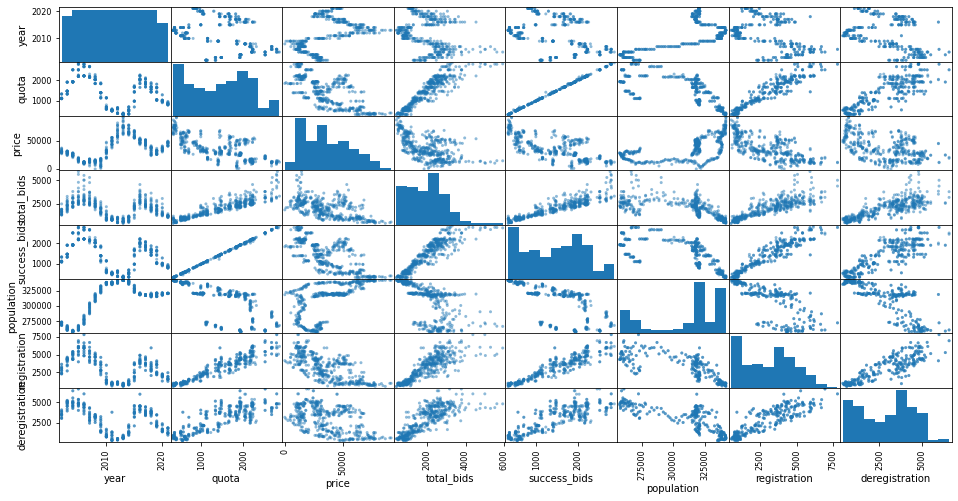

In [26]:
pd.plotting.scatter_matrix(cat_a, figsize=(16,8))

# Insights




In [27]:
cat_a.to_csv('../data/cat_a_population.csv', index=False)
cat_a.to_csv('../data/cat_b_population.csv', index=False)

# Merge Consumer Price Index (CPI) data

In [28]:
#Read Consumer Price Index (CPI) data for Transport, Car and Petrol indexes
cpi = pd.read_csv('../data/cpi.csv')

cpi.head()

,Date,Cars,Transport,Petrol,Cars percent change,Transport percent change,Petrol percent change
0,1961 Jan,NaN,20.538,NaN,NaN,0.0,NaN
1,1961 Feb,NaN,20.538,NaN,NaN,0.0,NaN
2,1961 Mar,NaN,20.538,NaN,NaN,0.0,NaN
3,1961 Apr,NaN,20.538,NaN,NaN,0.0,NaN
4,1961 May,NaN,20.538,NaN,NaN,0.0,NaN


In [29]:
cpi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      729 non-null    object 
 1   Cars                      93 non-null     float64
 2   Transport                 729 non-null    float64
 3   Petrol                    93 non-null     float64
 4   Cars percent change       92 non-null     float64
 5   Transport percent change  729 non-null    float64
 6   Petrol percent change     92 non-null     float64
dtypes: float64(6), object(1)
memory usage: 40.0+ KB


In [30]:
col_names = ['Date', 'cpi_car', 'cpi_transport', 'cpi_petrol', 'cpi_car_pct_change', 
             'cpi_transport_pct_change', 'cpi_petrol_pct_change']
cpi.set_axis(col_names, axis=1, inplace=True)

cpi.head()

,Date,cpi_car,cpi_transport,cpi_petrol,cpi_car_pct_change,cpi_transport_pct_change,cpi_petrol_pct_change
0,1961 Jan,NaN,20.538,NaN,NaN,0.0,NaN
1,1961 Feb,NaN,20.538,NaN,NaN,0.0,NaN
2,1961 Mar,NaN,20.538,NaN,NaN,0.0,NaN
3,1961 Apr,NaN,20.538,NaN,NaN,0.0,NaN
4,1961 May,NaN,20.538,NaN,NaN,0.0,NaN


In [31]:
#Drop null columns
cpi.dropna(inplace=True)
cpi.reset_index(inplace=True, drop=True)

cpi.head()

,Date,cpi_car,cpi_transport,cpi_petrol,cpi_car_pct_change,cpi_transport_pct_change,cpi_petrol_pct_change
0,2014 Feb,114.830,102.036,94.412,0.4,0.6,0.0
1,2014 Mar,116.761,102.641,95.497,1.7,0.6,1.1
2,2014 Apr,115.245,102.686,95.919,-1.3,0.0,0.4
3,2014 May,110.330,101.021,96.530,-4.3,-1.6,0.6
4,2014 Jun,109.561,100.813,96.927,-0.7,-0.2,0.4


In [32]:
#Convert date field from string to datetime data type
cpi['Date'] = pd.to_datetime(cpi['Date'], format='%Y %b')

cpi.head()

,Date,cpi_car,cpi_transport,cpi_petrol,cpi_car_pct_change,cpi_transport_pct_change,cpi_petrol_pct_change
0,2014-02-01,114.830,102.036,94.412,0.4,0.6,0.0
1,2014-03-01,116.761,102.641,95.497,1.7,0.6,1.1
2,2014-04-01,115.245,102.686,95.919,-1.3,0.0,0.4
3,2014-05-01,110.330,101.021,96.530,-4.3,-1.6,0.6
4,2014-06-01,109.561,100.813,96.927,-0.7,-0.2,0.4


In [33]:
#Merge current data (COE prices + vehicle numbers) with Consumer Price Index (CPI)
cat_a = pd.merge(
    cat_a.assign(grouper=cat_a['date'].dt.to_period('M')),
    cpi.assign(grouper=cpi['Date'].dt.to_period('M')),
    how='left', on='grouper'
)

cat_b = pd.merge(
    cat_b.assign(grouper=cat_b['date'].dt.to_period('M')),
    cpi.assign(grouper=cpi['Date'].dt.to_period('M')),
    how='left', on='grouper'
)

cat_a.head()

,bidding_exercise,date,year,category,quota,price,total_bids,success_bids,population,registration,deregistration,grouper,Date,cpi_car,cpi_transport,cpi_petrol,cpi_car_pct_change,cpi_transport_pct_change,cpi_petrol_pct_change
0,September 2021 Second Open Bidding Exercise,2021-09-22,2021,Cat A (Cars up to 1600cc and 97kW),803,48000,1040,795,321025.0,1484.0,1039.0,2021-09,2021-09-01,116.962,108.665,112.562,2.8,1.4,0.1
1,September 2021 First Open Bidding Exercise,2021-09-08,2021,Cat A (Cars up to 1600cc and 97kW),804,47000,1124,790,321025.0,1484.0,1039.0,2021-09,2021-09-01,116.962,108.665,112.562,2.8,1.4,0.1
2,August 2021 Second Open Bidding Exercise,2021-08-18,2021,Cat A (Cars up to 1600cc and 97kW),806,46689,1127,806,320580.0,1251.0,1256.0,2021-08,2021-08-01,113.737,107.214,112.399,0.1,-0.2,0.1
3,August 2021 First Open Bidding Exercise,2021-08-04,2021,Cat A (Cars up to 1600cc and 97kW),805,45189,1021,804,320580.0,1251.0,1256.0,2021-08,2021-08-01,113.737,107.214,112.399,0.1,-0.2,0.1
4,July 2021 Second Open Bidding Exercise,2021-07-22,2021,Cat A (Cars up to 1600cc and 97kW),836,47010,1240,832,320585.0,1598.0,1249.0,2021-07,2021-07-01,113.626,107.386,112.256,-0.9,0.0,2.8


In [34]:
cat_b.head()

,bidding_exercise,date,year,category,quota,price,total_bids,success_bids,population,registration,deregistration,grouper,Date,cpi_car,cpi_transport,cpi_petrol,cpi_car_pct_change,cpi_transport_pct_change,cpi_petrol_pct_change
0,September 2021 Second Open Bidding Exercise,2021-09-22,2021,Cat B (Cars above 1600cc or 97kW),772,68310,1189,768,322072.0,2403.0,1240.0,2021-09,2021-09-01,116.962,108.665,112.562,2.8,1.4,0.1
1,September 2021 First Open Bidding Exercise,2021-09-08,2021,Cat B (Cars above 1600cc or 97kW),791,62600,1080,788,322072.0,2403.0,1240.0,2021-09,2021-09-01,116.962,108.665,112.562,2.8,1.4,0.1
2,August 2021 Second Open Bidding Exercise,2021-08-18,2021,Cat B (Cars above 1600cc or 97kW),794,61001,1065,793,320909.0,2241.0,1336.0,2021-08,2021-08-01,113.737,107.214,112.399,0.1,-0.2,0.1
3,August 2021 First Open Bidding Exercise,2021-08-04,2021,Cat B (Cars above 1600cc or 97kW),771,56001,980,751,320909.0,2241.0,1336.0,2021-08,2021-08-01,113.737,107.214,112.399,0.1,-0.2,0.1
4,July 2021 Second Open Bidding Exercise,2021-07-22,2021,Cat B (Cars above 1600cc or 97kW),819,59501,1107,796,320004.0,1809.0,1332.0,2021-07,2021-07-01,113.626,107.386,112.256,-0.9,0.0,2.8


In [35]:
cat_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 0 to 461
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   bidding_exercise          462 non-null    object        
 1   date                      462 non-null    datetime64[ns]
 2   year                      462 non-null    int64         
 3   category                  462 non-null    object        
 4   quota                     462 non-null    int64         
 5   price                     462 non-null    int64         
 6   total_bids                462 non-null    int64         
 7   success_bids              462 non-null    int64         
 8   population                462 non-null    float64       
 9   registration              462 non-null    float64       
 10  deregistration            462 non-null    float64       
 11  grouper                   462 non-null    period[M]     
 12  Date                  

In [36]:
cat_a.drop(columns=['grouper', 'Date'], inplace=True)
cat_a.dropna(inplace=True)
cat_a.reset_index(inplace=True, drop=True)

cat_b.drop(columns=['grouper', 'Date'], inplace=True)
cat_b.dropna(inplace=True)
cat_b.reset_index(inplace=True, drop=True)

cat_a.head()

,bidding_exercise,date,year,category,quota,price,total_bids,success_bids,population,registration,deregistration,cpi_car,cpi_transport,cpi_petrol,cpi_car_pct_change,cpi_transport_pct_change,cpi_petrol_pct_change
0,September 2021 Second Open Bidding Exercise,2021-09-22,2021,Cat A (Cars up to 1600cc and 97kW),803,48000,1040,795,321025.0,1484.0,1039.0,116.962,108.665,112.562,2.8,1.4,0.1
1,September 2021 First Open Bidding Exercise,2021-09-08,2021,Cat A (Cars up to 1600cc and 97kW),804,47000,1124,790,321025.0,1484.0,1039.0,116.962,108.665,112.562,2.8,1.4,0.1
2,August 2021 Second Open Bidding Exercise,2021-08-18,2021,Cat A (Cars up to 1600cc and 97kW),806,46689,1127,806,320580.0,1251.0,1256.0,113.737,107.214,112.399,0.1,-0.2,0.1
3,August 2021 First Open Bidding Exercise,2021-08-04,2021,Cat A (Cars up to 1600cc and 97kW),805,45189,1021,804,320580.0,1251.0,1256.0,113.737,107.214,112.399,0.1,-0.2,0.1
4,July 2021 Second Open Bidding Exercise,2021-07-22,2021,Cat A (Cars up to 1600cc and 97kW),836,47010,1240,832,320585.0,1598.0,1249.0,113.626,107.386,112.256,-0.9,0.0,2.8


In [37]:
cat_a = cat_a.sort_values(by='date', ascending=True)
cat_b = cat_b.sort_values(by='date', ascending=True)

cat_a.head()

,bidding_exercise,date,year,category,quota,price,total_bids,success_bids,population,registration,deregistration,cpi_car,cpi_transport,cpi_petrol,cpi_car_pct_change,cpi_transport_pct_change,cpi_petrol_pct_change
177,February 2014 First Open Bidding Exercise,2014-02-05,2014,Cat A (Cars up to 1600cc and 97kW),362,71564,719,356,341169.0,754.0,1104.0,114.830,102.036,94.412,0.4,0.6,0.0
176,February 2014 Second Open Bidding Exercise,2014-02-19,2014,Cat A (Cars up to 1600cc and 97kW),362,77201,700,358,341169.0,754.0,1104.0,114.830,102.036,94.412,0.4,0.6,0.0
175,March 2014 First Open Bidding Exercise,2014-03-05,2014,Cat A (Cars up to 1600cc and 97kW),365,76999,615,356,340645.0,806.0,1330.0,116.761,102.641,95.497,1.7,0.6,1.1
174,March 2014 Second Open Bidding Exercise,2014-03-19,2014,Cat A (Cars up to 1600cc and 97kW),362,78602,577,360,340645.0,806.0,1330.0,116.761,102.641,95.497,1.7,0.6,1.1
173,April 2014 First Open Bidding Exercise,2014-04-09,2014,Cat A (Cars up to 1600cc and 97kW),367,77400,537,360,340066.0,768.0,1347.0,115.245,102.686,95.919,-1.3,0.0,0.4


In [38]:
cat_a.corr().style.background_gradient(cmap='coolwarm')

,year,quota,price,total_bids,success_bids,population,registration,deregistration,cpi_car,cpi_transport,cpi_petrol,cpi_car_pct_change,cpi_transport_pct_change,cpi_petrol_pct_change
year,1.000000,-0.045371,-0.756332,-0.097982,-0.045617,-0.656931,-0.008387,-0.346391,-0.331392,0.434064,0.602983,0.237513,0.254583,0.195850
quota,-0.045371,1.000000,-0.323740,0.884813,0.999157,-0.701399,0.879172,0.847236,-0.525472,-0.600813,-0.316337,-0.084363,-0.056486,0.010873
price,-0.756332,-0.323740,1.000000,-0.220501,-0.322868,0.795838,-0.318370,-0.039581,0.829414,0.122268,-0.396172,0.008130,-0.003242,-0.021752
total_bids,-0.097982,0.884813,-0.220501,1.000000,0.884250,-0.582073,0.740877,0.786847,-0.448416,-0.614934,-0.380823,0.070823,0.062039,0.074577
success_bids,-0.045617,0.999157,-0.322868,0.884250,1.000000,-0.700969,0.877791,0.846465,-0.525206,-0.600650,-0.316757,-0.081275,-0.052298,0.014190
population,-0.656931,-0.701399,0.795838,-0.582073,-0.700969,1.000000,-0.635377,-0.410810,0.658556,0.168825,-0.177271,-0.115965,-0.145581,-0.122522
registration,-0.008387,0.879172,-0.318370,0.740877,0.877791,-0.635377,1.000000,0.782375,-0.497600,-0.519962,-0.242439,-0.063323,-0.033626,0.031012
deregistration,-0.346391,0.847236,-0.039581,0.786847,0.846465,-0.410810,0.782375,1.000000,-0.351057,-0.647029,-0.445295,-0.128291,-0.129977,-0.017826
cpi_car,-0.331392,-0.525472,0.829414,-0.448416,-0.525206,0.658556,-0.497600,-0.351057,1.000000,0.595089,-0.006132,0.187146,0.171961,0.101491
cpi_transport,0.434064,-0.600813,0.122268,-0.614934,-0.600650,0.168825,-0.519962,-0.647029,0.595089,1.000000,0.741161,0.257857,0.315668,0.258394


array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='quota', ylabel='year'>,
        <AxesSubplot:xlabel='price', ylabel='year'>,
        <AxesSubplot:xlabel='total_bids', ylabel='year'>,
        <AxesSubplot:xlabel='success_bids', ylabel='year'>,
        <AxesSubplot:xlabel='population', ylabel='year'>,
        <AxesSubplot:xlabel='registration', ylabel='year'>,
        <AxesSubplot:xlabel='deregistration', ylabel='year'>,
        <AxesSubplot:xlabel='cpi_car', ylabel='year'>,
        <AxesSubplot:xlabel='cpi_transport', ylabel='year'>,
        <AxesSubplot:xlabel='cpi_petrol', ylabel='year'>,
        <AxesSubplot:xlabel='cpi_car_pct_change', ylabel='year'>,
        <AxesSubplot:xlabel='cpi_transport_pct_change', ylabel='year'>,
        <AxesSubplot:xlabel='cpi_petrol_pct_change', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='quota'>,
        <AxesSubplot:xlabel='quota', ylabel='quota'>,
        <AxesSubplot:xlabel='price', ylabel='quota'>,
 

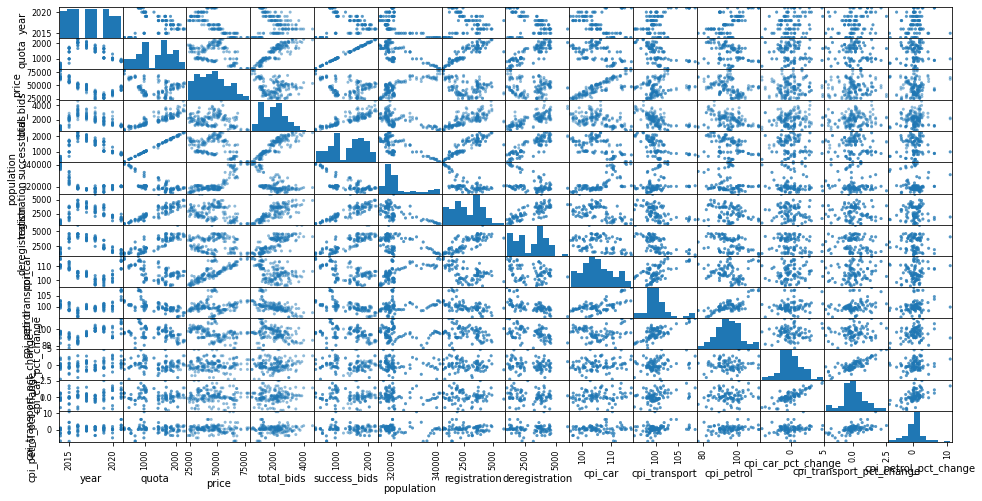

In [39]:
pd.plotting.scatter_matrix(cat_a, figsize=(16,8))

In [40]:
#Write cleaned data to .csv file
cat_a.to_csv('../data/cat_a_population_cpi.csv', index=False)
cat_b.to_csv('../data/cat_b_population_cpi.csv', index=False)